## Connect to Catmaid Server

In [1]:
import pymaid

source = pymaid.CatmaidInstance('https://fafb.catmaid.virtualflybrain.org/' , api_token=None) #'9944b09199c62bcf9418ad846dd0e4bbdfc6ee4b'

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


## Retrieve Annotations

In [2]:
neurons = pymaid.get_annotated("Paper: Zheng et al 2018") # Paper of interest

INFO  : Searching for: Paper: Zheng et al 2018 (pymaid)


In [3]:
neurons

id                                            name    type  \
0          17              Uniglomerular mALT VA6 adPN 017 DB  neuron   
1        7287                               KCa'B'ap 7287 EAM  neuron   
2        7647                                 KCa'B'm 7647 LK  neuron   
3        9579                                    KCy 9579 EAM  neuron   
4       11743                               KCa'B'm 11743 BAK  neuron   
..        ...                                             ...     ...   
140   1775707           Uniglomerular mALT DL1 adPN 22153 JMR  neuron   
141   1785035             Uniglomerular mALT DA2 lPN 57399 LK  neuron   
142   3104791                                    KCy 16943 BH  neuron   
143   3445526                                  KCy 6487 ML-NS  neuron   
144  14003784  Uniglomerular mALT VP5 + SEZ adPN 57472 LK ECM  neuron   

    skeleton_ids  
0           [16]  
1         [7286]  
2         [7646]  
3         [9578]  
4        [11742]  
..           ...  
140    [1775706]  
141    [1785034]  
142    [3104789]  
143    [3445525]  
144   [14003783]  

[145 rows x 4 columns]

## Get Neuron IDs in a List for Indexing

In [4]:
neuron_ids = [j for j in neurons["skeleton_ids"]] # Get neuron IDs

old = neuron_ids
neuron_ids = []

for i in range(len(old)):
    neuron_ids.append(old[i][0])

## Import Connectome Options

### Adjacency Matrix Between Source and Target Neurons

<AxesSubplot:>

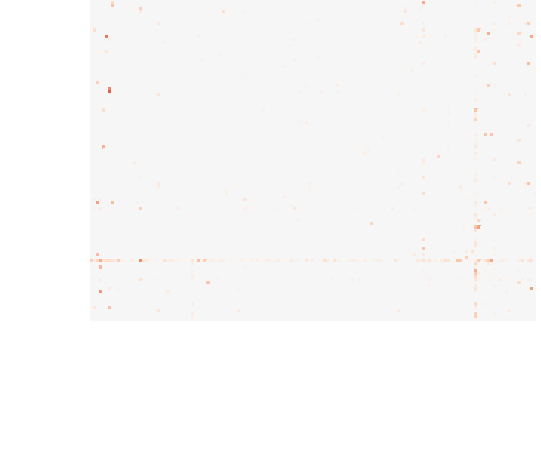

In [5]:
connectome = pymaid.adjacency_matrix(neuron_ids)
connectome = connectome.to_numpy()

from graspologic.plot import heatmap
heatmap(connectome)

### Adjacency Matrix From Neurons' Connectors

`pymaid.adjacency_from_connectors` is meant to generate an adjacency matrix from data with repeated skeleton ids. Our IDs do not repeat so this was skipped.

### Edges Between Sets of Neurons

In [6]:
pymaid.get_edges(neuron_ids)

source    target  weight
0    203840        16      13
1    203840      7286       4
2    203840      7646      11
3    203840      9578      20
4    203840     11742       6
..      ...       ...     ...
826   57385     57418       1
827   57385     60445       1
828   57385   1785034       1
829   46105     57503       2
830   46105  14003783       1

[831 rows x 3 columns]

#### This is just the same as the original connectome imported earlier, as shown below:

In [7]:
len(connectome[connectome != 0])

831

### Partners connected by synapses, gap junctions, or attachments

In [8]:
pymaid.get_partners(neuron_ids)

INFO  : Fetching connectivity table for 145 neurons (pymaid)


HTTPError: 1 errors encountered: 413 Server Error: Request Entity Too Large for url: https://fafb.catmaid.virtualflybrain.org/1/skeleton/neuronnames

In [9]:
# DO NOT DELETE THIS: IT EXPORTS FILE TO HTML

!jupyter nbconvert --to html pymaid_import.ipynb

[NbConvertApp] Converting notebook pymaid_import.ipynb to html
[NbConvertApp] Writing 4590047 bytes to pymaid_import.html
